In [42]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import association_metrics as am
import matplotlib.pyplot as plt

In [107]:
#read all the datasets
df_k80_50k = pd.read_csv("./data/simple.k80.s221.50k.csv.gz", compression='gzip', header=None, sep=' ')
df_k160_100k_f74 = pd.read_csv("./data/simple.k160.s221.100k.f74.csv.gz", compression='gzip', header=None, sep=' ')
df_k160_100k_f75 = pd.read_csv("./data/simple.k160.s221.100k.f75.csv.gz", compression='gzip', header=None, sep=' ')
df_k160_100k_f76 = pd.read_csv("./data/simple.k160.s221.100k.f76.csv.gz", compression='gzip', header=None, sep=' ')
df_k160_500k_f75 = pd.read_csv("./data/simple.k160.s221.500k.f75.csv.gz", compression='gzip', header=None, sep=' ')

In [111]:
#convert to categorical
df_k80_50k = df_k80_50k.astype('category')
df_k160_100k_f74 = df_k160_100k_f74.astype('category')
df_k160_100k_f75 = df_k160_100k_f75.astype('category')
df_k160_100k_f76 = df_k160_100k_f76.astype('category')
df_k160_500k_f75 = df_k160_500k_f75.astype('category')

In [115]:
datasets_dict = {
    'k80_50k': df_k80_50k,
    'k160_100k_f74': df_k160_100k_f74,
    'k160_100k_f75': df_k160_100k_f75,
    'k160_100k_f76': df_k160_100k_f76,
    'k160_500k_f75': df_k160_500k_f75
}

In [139]:
#correlations for all the datasets
corr_dict = {}
for dataset_name, dataset in datasets_dict.items():
    cramersv = am.CramersV(dataset)
    corr_matrix = cramersv.fit()
    corr_dict[dataset_name] = corr_matrix.iloc[-1]

In [140]:
#convert to dataframe
corr_df = pd.DataFrame(corr_dict)

In [142]:
corr_df = corr_df.iloc[:-1,:]

In [137]:
corr_df.head()

,k80_50k,k160_100k_f74,k160_100k_f75,k160_100k_f76,k160_500k_f75
0,0.002551,0.011159,0.003984,0.000392,0.002377
1,0.009416,0.030873,0.030442,0.005183,0.002277
2,0.001399,0.017094,0.024274,0.012408,0.007435
3,0.007041,0.005138,0.000413,0.004338,0.001941
4,0.006923,0.003613,0.018553,0.004296,0.002808


In [155]:
#from each column find the max 20 correlations and their indices, and store them in a dictionary
corr_dict_indv = {}
for col in corr_df.columns:
    corr_dict_indv[col] = corr_df[col].nlargest(20)#.to_dict()

In [158]:
#dataframes
dataframes = []
for dataset_name, dataset in corr_dict_indv.items():
    df = pd.DataFrame(dataset)
    dataframes.append(df)

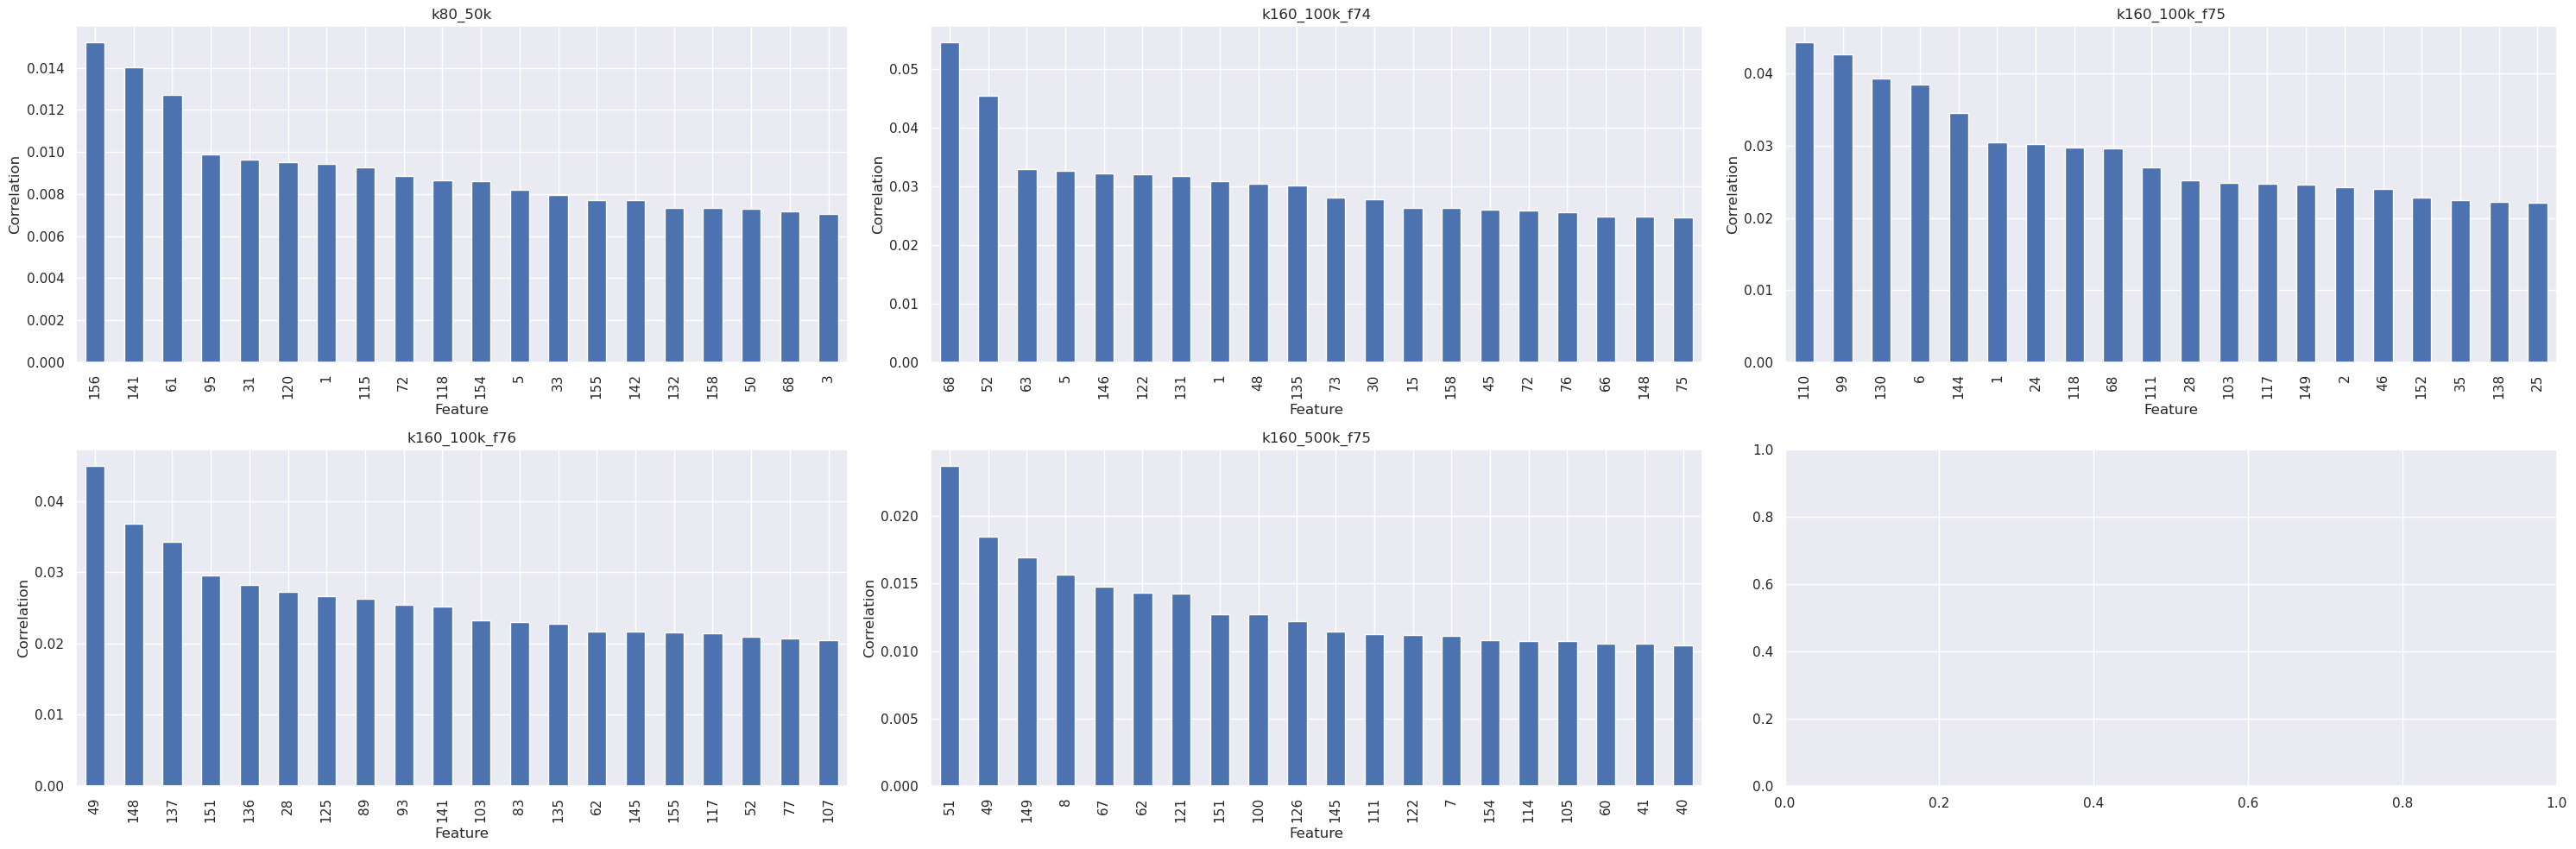

In [167]:
#subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
axes = axes.flatten()
for ax, df in zip(axes.flatten(), dataframes):
    df.plot.bar(ax=ax, legend=False)
    ax.set_title(df.columns[0])
    ax.set_xlabel('Feature')
    ax.set_ylabel('Correlation')
plt.tight_layout()
plt.show()

#### Feaure numbers are the name of the columns represented in X and Y axis representing the correlation between the features and the target variable. I used Cramér's V method to calculate the correlation between the features and the target variable. This method is used to calculate the correlation between categorical variables.

In [2]:
# def CrammersV(dfs: list):
#     #correlations for all the datasets
#     result_dfs = []
#     for dataset in dfs:
#         #convert to categorical
#         dataset = dataset.astype('category')
#         cramersv = am.CramersV(dataset)
#         corr_matrix = cramersv.fit()
#         indices = corr_matrix.iloc[:, -1].nlargest(20).index.values
#         result_dfs.append(dataset[:, indices])
#     return result_dfs

In [8]:
simple_k67 = pd.read_csv("./data/simple.k67.s112.100k.f83.csv.gz", compression='gzip', header=None, sep=' ')
prefix_k67 = pd.read_csv("./data/prefix.k67.s112.1500k.f73.csv.gz", compression='gzip', header=None, sep=' ')
prefix_k67_f66 = pd.read_csv("./data/prefix.k67.s112.1500k.f66.csv.gz", compression='gzip', header=None, sep=' ')

In [9]:
prefix_k67_f66

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0,1,1,0,1,0,0,0,1,1,...,0,0,1,1,0,0,1,1,0,1
1,1,0,0,0,0,1,0,1,1,1,...,0,0,1,1,0,0,1,1,0,1
2,1,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,0,1,1,0,0
3,0,0,1,0,1,1,1,0,0,1,...,0,0,1,1,0,0,1,1,0,0
4,0,1,1,0,1,1,1,0,1,1,...,1,0,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,1,1,1,1,0,1,1,1,1,1,...,1,0,1,1,0,0,1,1,0,1
5855,1,0,1,0,1,0,1,1,1,0,...,1,0,1,1,0,0,1,1,0,0
5856,0,1,0,1,1,0,0,0,0,1,...,0,0,1,1,0,0,1,1,0,0
5857,0,1,0,1,1,0,1,1,1,1,...,1,0,1,1,0,0,1,1,0,0


In [10]:
#convert to categorical
simple_k67 = simple_k67.astype('category')
prefix_k67 = prefix_k67.astype('category')
prefix_k67_f66 = prefix_k67_f66.astype('category')

In [12]:
# #correlation simple_k67
# cramersv_simple_k67 = am.CramersV(simple_k67)
# corr_matrix_simple_k67 = cramersv_simple_k67.fit()
# indices_simple_k67 = corr_matrix_simple_k67.iloc[:, -1].nlargest(20).index.values

In [13]:
#correlation prefix_k67_f66
cramersv_prefix_k67_f66 = am.CramersV(prefix_k67_f66)
corr_matrix_prefix_k67_f66 = cramersv_prefix_k67_f66.fit()

ValueError: 0 and 152 must have at least 2 different levels

In [106]:
#select the features from the indices
simple_k67_selected = simple_k67.iloc[:, indices_simple_k67]
prefix_k67_selected = prefix_k67.iloc[:, indices_prefix_k67]

In [107]:
simple_k67_selected.head(2)

,160,76,52,50,131,22,83,157,96,40,44,84,57,9,119,21,82,145,0,7
0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0
1,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1


In [108]:
#take col 160 to the end
target_simple_k67 = simple_k67_selected[160]
target_prefix_k67 = prefix_k67_selected[160]
#drop the target column
simple_k67_selected = simple_k67_selected.drop(160, axis=1)
prefix_k67_selected = prefix_k67_selected.drop(160, axis=1)
#add the target column to the end
simple_k67_selected[160] = target_simple_k67
prefix_k67_selected[160] = target_prefix_k67

In [109]:
#convert to numbers
simple_k67_selected = simple_k67_selected.apply(lambda x: x.cat.codes)
prefix_k67_selected = prefix_k67_selected.apply(lambda x: x.cat.codes)

In [130]:
simple_k67_selected.to_csv("./data/simple.k67.s112.100k.f83_selected.csv.gz", compression='gzip', header=None, index=None, sep=' ')
prefix_k67_selected.to_csv("./data/prefix.k67.s112.1500k.f73_selected.csv.gz", compression='gzip', header=None, index=None, sep=' ')

In [131]:
#shapes
simple_k67_selected.shape, prefix_k67_selected.shape

((5663, 20), (5770, 20))

In [112]:
prefix_k67_selected.head()

,76,52,50,131,22,83,157,96,40,44,84,57,9,119,21,82,145,0,7,160
0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0
1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0
2,1,0,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1
3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,1,0,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,0,0


<AxesSubplot:>

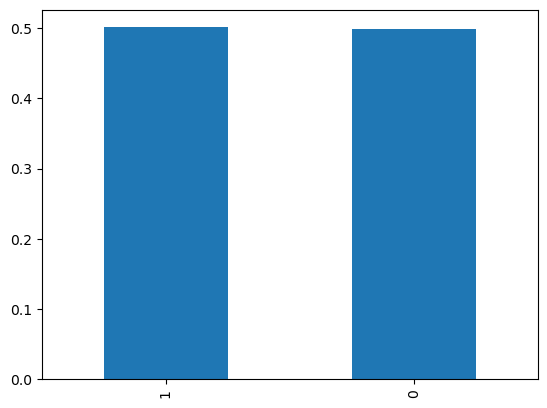

In [113]:
#find class ratios for simple_k67
simple_k67_selected[160].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

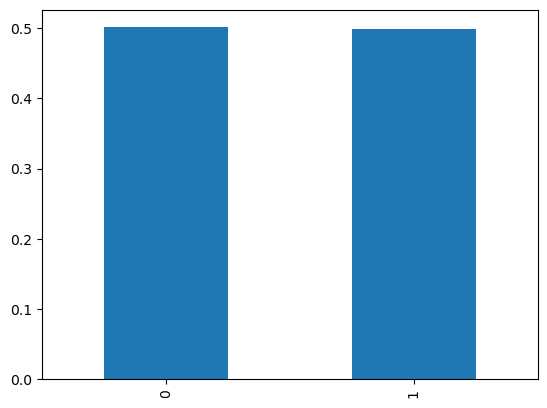

In [114]:
#find class ratios for prefix_k67 
prefix_k67_selected[160].value_counts(normalize=True).plot.bar()

In [88]:
import pandas as pd

In [89]:
path = "/home/pops/myProjects/Up/TabSurvey/Sample Code/prefix.k67.s112.1500k.f66.csv.gz"

In [90]:
#don't read header
df = pd.read_csv(path, compression='gzip', header= None, sep=' ')

In [91]:
#convert to categorical
df = df.astype('category')

In [92]:
#drop columns 152 to 159
df = df.drop(df.columns[152:160], axis=1)

In [93]:
df_corr = am.CramersV(df).fit()

In [105]:
#select the features from the indices
indices = df_corr.iloc[:, -1].nlargest(10).index.values
df_selected = df[indices]

In [106]:
#take col 160 to the end
target = df_selected[160]
#drop the target column
df_selected = df_selected.drop(160, axis=1)
#add the target column to the end
df_selected[160] = target

In [107]:
#convert to numbers
df_selected = df_selected.apply(lambda x: x.cat.codes)

In [108]:
#export to csv
df_selected.to_csv("./data/prefix.k67.s112.1500k.f66_selected_10.csv.gz", compression='gzip', header=None, index=None, sep=' ')

In [109]:
df_selected.shape

(5859, 10)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/pops/myProjects/Up/TabSurvey/data/range.k67.s112.1500k.f83.f2_38.csv.gz', compression='gzip', header=None, sep=' ')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,1,0,0,0,1,1,0,1,0,0,...,1,0,1,1,1,0,0,1,1,0
1,1,0,0,1,0,1,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0,1,0,0,1,1,1,1,0,0,...,1,0,0,1,1,0,0,1,1,1
3,0,1,1,1,0,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,1,0,0,...,1,1,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,0,0,1,0,0,1,1,0,1,0,...,1,0,0,0,1,1,1,1,0,1
5837,1,0,1,0,1,0,1,0,0,1,...,0,0,1,1,1,0,1,1,0,1
5838,1,1,0,0,0,1,0,0,0,1,...,1,0,0,1,1,1,1,1,1,1
5839,1,0,1,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,0


In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('data/prefix.k67.s112.1500k.f[0, 20, 40, 60, 80, 100, 120, 140].csv.gz', compression='gzip', header=None, sep=' ')

In [5]:
df2 = pd.read_csv('data/range.k67.s112.1500k.f47.f2_52.csv.gz', compression='gzip', header=None, sep=' ')

In [8]:
df2

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0,1,1,1,0,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
1,0,1,1,0,0,0,0,1,1,0,...,1,1,0,1,0,1,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,1
3,1,0,0,0,1,0,1,0,1,0,...,1,0,1,1,1,0,1,0,1,0
4,0,0,1,0,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,0,1,0,0,0,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
6576,1,0,0,1,1,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
6577,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,1
6578,0,0,0,0,1,1,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
path = '/home/pops/myProjects/Up/TabSurvey/data/fwht.k160.s112.50k.csv.gz'

In [16]:
df_fwht = pd.read_csv(path, compression='gzip', header=None, sep=' ')
print(df_fwht.shape)
df_fwht.head()

(50000, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,75,3,-1,-1,-1,-1,3,3,-1,7,...,-5,-5,-5,7,-1,-1,7,3,-5,0
1,74,-8,-2,0,-4,2,0,2,0,-6,...,-2,0,-2,4,-2,-2,4,2,-4,0
2,85,-7,11,-1,-11,-3,-5,3,3,-5,...,1,1,9,-5,3,1,-3,11,7,1
3,87,-3,3,-3,-1,1,7,5,5,-5,...,5,-7,3,-7,15,-11,3,-7,-5,0
4,91,-3,11,-7,3,-7,-9,9,1,11,...,1,-7,3,-3,11,1,-1,-15,3,0


In [17]:
#find correlations
corr_df = df_fwht.corr()[256]

In [20]:
#find absolute values
corr_df = corr_df.abs()

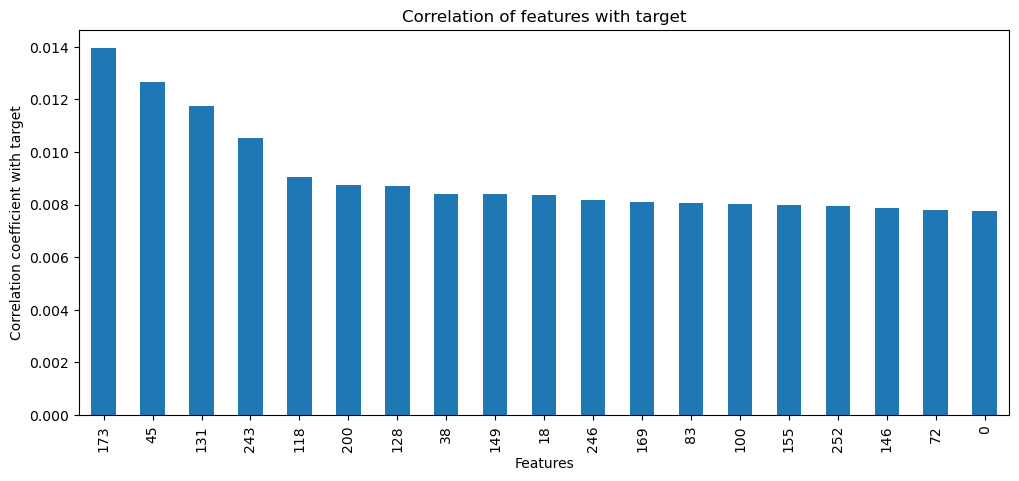

In [21]:
#find the 20 most correlated features excluding the target
corr_df.nlargest(20).drop(256).plot.bar(figsize=(12, 5))
#axes
plt.xlabel('Features')
plt.ylabel('Correlation coefficient with target')
plt.title('Correlation of features with target')
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
path = 'data/fwht2.k128.s112.50k.csv.gz'
df = pd.read_csv(path, compression='gzip', header=None, sep=' ')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,70,-8,0,-18,-4,2,2,4,0,-2,...,-5,-1,-7,5,-7,-3,7,-9,-13,3
1,74,-2,-2,-2,-8,-4,4,-4,2,-10,...,-4,6,-4,-6,-12,-6,-6,-8,6,-12
2,63,-5,-3,9,-3,-3,3,-5,7,3,...,-9,15,-1,11,-1,-1,-5,3,3,7
3,57,3,7,9,7,9,1,-5,3,-3,...,0,6,-2,-8,2,12,-6,-12,6,0
4,57,-1,1,-1,-9,1,11,-3,1,-5,...,0,6,-2,-4,-10,0,-4,-2,4,2


In [8]:
df_new = df.iloc[:, 0:129]
print(df_new.shape)

(50000, 129)


In [9]:
#len(df[255].unique())
len(df_new[128].value_counts())

48

<AxesSubplot:>

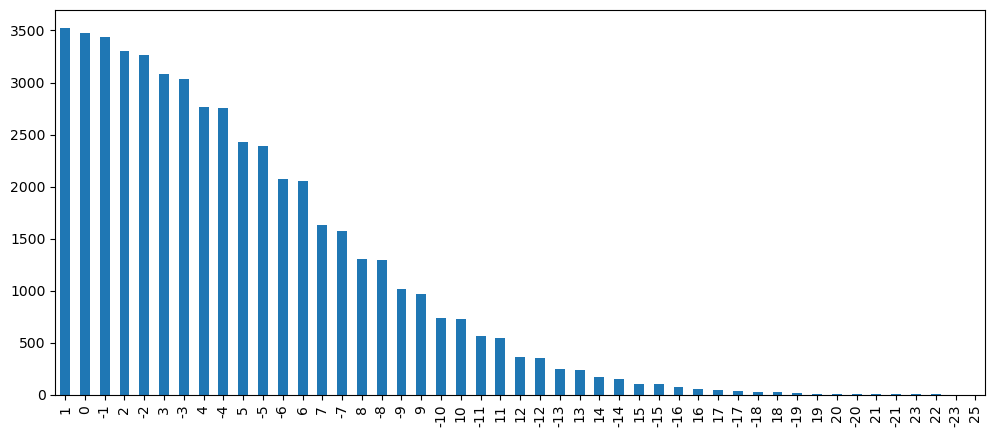

In [10]:
#find number of smaples per class
df[255].value_counts().plot.bar(figsize=(12, 5))

In [12]:
path = '/home/pops/myProjects/Up/TabSurvey/output/XGBoost/fwht2_k128_s112_50k/predictions/p_0.npy'

In [13]:
res = np.load(path)

In [14]:
res

array([[67.        , 64.02970123],
       [70.        , 63.87349319],
       [60.        , 63.76094437],
       ...,
       [61.        , 63.84617996],
       [67.        , 64.08118439],
       [61.        , 63.88824463]])

In [19]:
pd.DataFrame(res)

,0,1
0,67.0,64.029701
1,70.0,63.873493
2,60.0,63.760944
3,66.0,64.174995
4,65.0,63.880760
...,...,...
9995,72.0,64.032814
9996,52.0,63.826729
9997,61.0,63.846180
9998,67.0,64.081184


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#DANet
path_0 = '/home/pops/myProjects/Up/TabSurvey/output/DANet/fwht2_k128_s112_50k/predictions/p_0.npy'
path_1 = '/home/pops/myProjects/Up/TabSurvey/output/DANet/fwht2_k128_s112_50k/predictions/p_1.npy'
path_2 = '/home/pops/myProjects/Up/TabSurvey/output/DANet/fwht2_k128_s112_50k/predictions/p_2.npy'
path_3 = '/home/pops/myProjects/Up/TabSurvey/output/DANet/fwht2_k128_s112_50k/predictions/p_3.npy'
path_4 = '/home/pops/myProjects/Up/TabSurvey/output/DANet/fwht2_k128_s112_50k/predictions/p_4.npy'

data_0 = np.load(path_0)
data_1 = np.load(path_1)
data_2 = np.load(path_2)
data_3 = np.load(path_3)
data_4 = np.load(path_4)

In [44]:
data_0[:20, :]

array([[67.        , 69.16040802],
       [70.        , 69.16040802],
       [60.        , 69.16040802],
       [66.        , 69.16040802],
       [65.        , 69.16040802],
       [56.        , 69.16040802],
       [61.        , 69.16040802],
       [74.        , 69.16040802],
       [76.        , 69.16040802],
       [61.        , 69.16040802],
       [57.        , 69.16040802],
       [60.        , 69.16040802],
       [52.        , 69.16040802],
       [72.        , 69.16040802],
       [64.        , 69.16040802],
       [60.        , 69.16040802],
       [65.        , 69.16040802],
       [66.        , 69.16040802],
       [64.        , 69.16040802],
       [57.        , 69.16040802]])

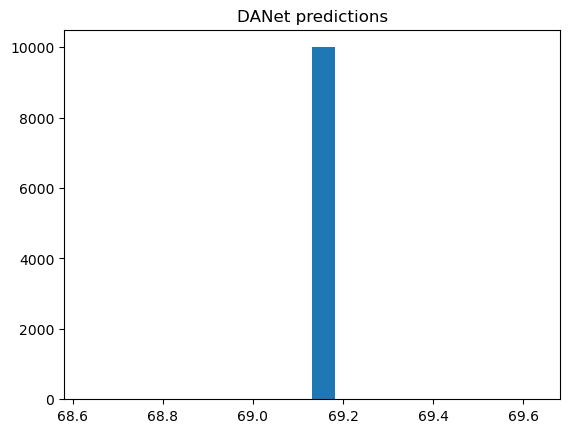

In [41]:
#plot a histogram of the predictions
plt.hist(data_1[:, 1], bins=20)
plt.title('DANet predictions')
plt.show()

In [30]:
#LightGBM
path_0 = '/home/pops/myProjects/Up/TabSurvey/output/LightGBM/fwht2_k128_s112_50k/predictions/p_0.npy'
path_1 = '/home/pops/myProjects/Up/TabSurvey/output/LightGBM/fwht2_k128_s112_50k/predictions/p_1.npy'
path_2 = '/home/pops/myProjects/Up/TabSurvey/output/LightGBM/fwht2_k128_s112_50k/predictions/p_2.npy'
path_3 = '/home/pops/myProjects/Up/TabSurvey/output/LightGBM/fwht2_k128_s112_50k/predictions/p_3.npy'
path_4 = '/home/pops/myProjects/Up/TabSurvey/output/LightGBM/fwht2_k128_s112_50k/predictions/p_4.npy'

data_0 = np.load(path_0)
data_1 = np.load(path_1)
data_2 = np.load(path_2)
data_3 = np.load(path_3)
data_4 = np.load(path_4)

In [31]:
data_0[:, 1]

array([64.03252354, 63.99401591, 63.96858827, ..., 64.00588836,
       63.99022564, 64.00500189])

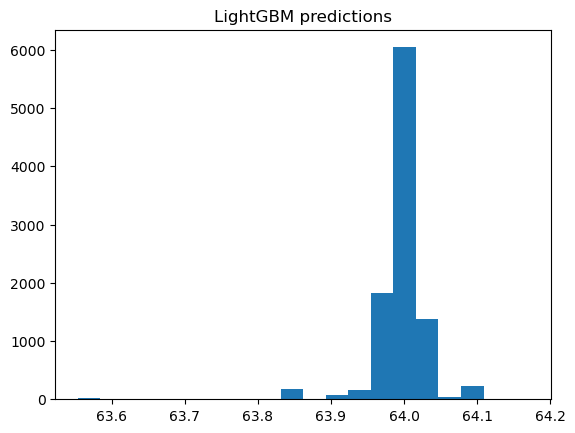

In [32]:
#plot a histogram of the predictions
plt.hist(data_0[:, 1], bins=20)
plt.title('LightGBM predictions')
plt.show()

In [33]:
#XGBoost
path_0 = '/home/pops/myProjects/Up/TabSurvey/output/XGBoost/fwht2_k128_s112_50k/predictions/p_0.npy'
path_1 = '/home/pops/myProjects/Up/TabSurvey/output/XGBoost/fwht2_k128_s112_50k/predictions/p_1.npy'
path_2 = '/home/pops/myProjects/Up/TabSurvey/output/XGBoost/fwht2_k128_s112_50k/predictions/p_2.npy'
path_3 = '/home/pops/myProjects/Up/TabSurvey/output/XGBoost/fwht2_k128_s112_50k/predictions/p_3.npy'
path_4 = '/home/pops/myProjects/Up/TabSurvey/output/XGBoost/fwht2_k128_s112_50k/predictions/p_4.npy'

data_0 = np.load(path_0)
data_1 = np.load(path_1)
data_2 = np.load(path_2)
data_3 = np.load(path_3)
data_4 = np.load(path_4)

data_0[:, 1]

array([64.02970123, 63.87349319, 63.76094437, ..., 63.84617996,
       64.08118439, 63.88824463])

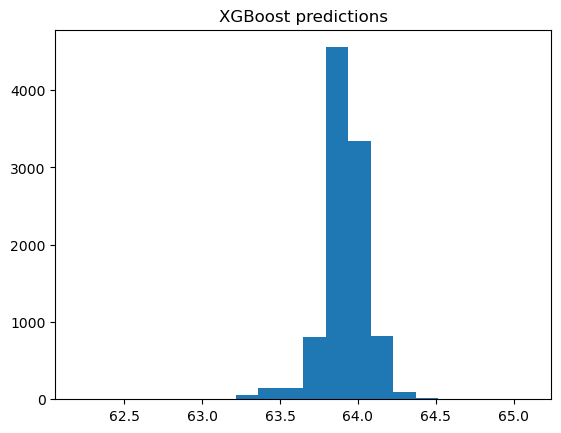

In [34]:
#plot a histogram of the predictions
plt.hist(data_0[:, 1], bins=20)
plt.title('XGBoost predictions')
plt.show()

In [35]:
#TabNet
path_0 = '/home/pops/myProjects/Up/TabSurvey/output/TabNet/fwht2_k128_s112_50k/predictions/p_0.npy'
path_1 = '/home/pops/myProjects/Up/TabSurvey/output/TabNet/fwht2_k128_s112_50k/predictions/p_1.npy'
path_2 = '/home/pops/myProjects/Up/TabSurvey/output/TabNet/fwht2_k128_s112_50k/predictions/p_2.npy'
path_3 = '/home/pops/myProjects/Up/TabSurvey/output/TabNet/fwht2_k128_s112_50k/predictions/p_3.npy'
path_4 = '/home/pops/myProjects/Up/TabSurvey/output/TabNet/fwht2_k128_s112_50k/predictions/p_4.npy'

data_0 = np.load(path_0)
data_1 = np.load(path_1)
data_2 = np.load(path_2)
data_3 = np.load(path_3)
data_4 = np.load(path_4)

data_0[:, 1]

array([63.6758461 , 63.47789764, 63.689785  , ..., 63.55245972,
       63.5379982 , 63.61736298])

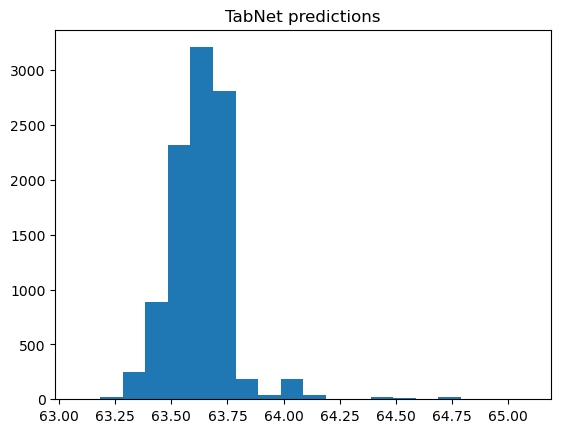

In [36]:
#plot a histogram of the predictions
plt.hist(data_0[:, 1], bins=20)
plt.title('TabNet predictions')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#correlation matrix using phik
iris.phik_matrix()

interval columns not set, guessing: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.568307,0.793421,0.729882,0.753425
sepal_width,0.568307,1.000000,0.512821,0.723710,0.607902
petal_length,0.793421,0.512821,1.000000,0.778498,0.994493
petal_width,0.729882,0.723710,0.778498,1.000000,0.951468
species,0.753425,0.607902,0.994493,0.951468,1.000000


In [4]:
iris.corr()

/tmp/ipykernel_9059/2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [5]:
#df names: 
#simple.k80.s221.50k.csv.gz
#simple.k160.s221.50k.csv.gz

In [6]:
#Good accuracy
#k_67_s112_100k_f83_selected -> 0.53876
#k160_100k -> 0.52944
#k160_s221_100k_f75_selected -> 0.53953
#prefix_k67_s112_1500k_f66_selected -> 0.537
#prefix_k67_s112_1500k_f66_selected_10 -> 0.539

In [7]:
path = "/home/pops/myProjects/Up/TabSurvey/data/simple.k160.s221.100k.f75.csv.gz"
df = pd.read_csv(path, compression='gzip', header=None, sep=' ')

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,1,0,1,0,1,1,1,1,1,1,...,0,0,0,0,1,1,1,0,1,0
1,1,1,1,1,1,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,1,1,0,1,1
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,1
4,1,0,0,0,1,1,1,1,1,1,...,1,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,1,0,1,0,0,1,0,0,0,1,...,1,1,0,1,0,0,1,0,0,0
4600,0,1,0,0,1,0,0,0,1,0,...,1,1,0,1,0,0,1,1,1,0
4601,1,1,0,1,0,1,1,1,0,0,...,0,0,0,1,0,1,0,1,1,0
4602,0,1,1,1,0,0,1,1,1,1,...,0,1,0,0,0,1,1,1,0,0


In [9]:
#correlation matrix using phik
corr_matrix = df.phik_matrix()

interval columns not set, guessing: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160]


In [10]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,1.000000,0.000000,0.000000,0.000000,0.031441,0.057867,0.000000,0.000000,0.000000,0.000000,...,0.015847,0.000000,0.033790,0.000000,0.020720,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.005678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.051371,0.000000,0.000000,0.036093,0.000000,0.024970,0.019980,0.000000,0.041046
2,0.000000,0.005678,1.000000,0.026043,0.000000,0.022934,0.000000,0.000000,0.000000,0.009801,...,0.024233,0.000000,0.000000,0.000000,0.027883,0.038384,0.000000,0.034421,0.000000,0.029433
3,0.000000,0.000000,0.026043,1.000000,0.000000,0.000000,0.000000,0.013546,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.035359,0.000000,0.000000,0.009394,0.000000,0.000000,0.000000
4,0.031441,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.042770,0.000000,0.043248,0.001901,0.000000,0.000000,0.000000,0.000000,0.013453,0.016554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.000000,0.000000,0.038384,0.000000,0.000000,0.029702,0.022678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.027284,0.000000,0.050984,1.000000,0.000000,0.000000,0.009869,0.000000
157,0.000000,0.024970,0.000000,0.009394,0.000000,0.000000,0.007580,0.000000,0.037508,0.025279,...,0.000000,0.024759,0.010152,0.014890,0.000000,0.000000,1.000000,0.027077,0.005861,0.000000
158,0.000000,0.019980,0.034421,0.000000,0.000000,0.000000,0.000000,0.000000,0.038539,0.017260,...,0.030942,0.000000,0.024288,0.045860,0.000000,0.000000,0.027077,1.000000,0.000000,0.000000
159,0.000000,0.000000,0.000000,0.000000,0.013453,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027949,0.000000,0.000000,0.032715,0.005621,0.009869,0.005861,0.000000,1.000000,0.000000


In [12]:
#find the top 20 correlated features
corr_matrix.iloc[:,-1].sort_values(ascending=False)[:10]

/tmp/ipykernel_9059/519601251.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  corr_matrix.iloc[:,-1].sort_values(ascending=False)[:10]


160    1.000000
110    0.064880
99     0.062167
130    0.056410
6      0.055045
144    0.048152
1      0.041046
24     0.040688
118    0.039873
68     0.039596
Name: 160, dtype: float64

In [14]:
#select the columns
columns = corr_matrix.iloc[:,-1].sort_values(ascending=False)[:10].index.tolist()

/tmp/ipykernel_9059/3512995071.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  columns = corr_matrix.iloc[:,-1].sort_values(ascending=False)[:10].index.tolist()


In [15]:
#select the columns
df_selected = df[columns]
df_selected.head()

,160,110,99,130,6,144,1,24,118,68
0,0,1,1,0,1,0,0,1,0,1
1,1,0,0,1,0,1,1,0,0,1
2,1,1,1,1,0,0,1,0,0,1
3,1,0,0,1,0,1,1,1,1,0
4,0,1,0,0,1,1,0,0,1,0


In [16]:
#take 160th column to the end
target = df.iloc[:,160:]
df_selected = pd.concat([df_selected.drop(columns=160), target], axis=1)
df_selected.head()

,110,99,130,6,144,1,24,118,68,160
0,1,1,0,1,0,0,1,0,1,0
1,0,0,1,0,1,1,0,0,1,1
2,1,1,1,0,0,1,0,0,1,1
3,0,0,1,0,1,1,1,1,0,1
4,1,0,0,1,1,0,0,1,0,0


In [17]:
#export the dataset
df_selected.to_csv("/home/pops/myProjects/Up/TabSurvey/data/simple.k160.s221.100k.f75.selected_phik_10.csv.gz", compression='gzip', index=False, header=False, sep=' ')